In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
# %matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

from scipy.interpolate import interp1d

import nanonets_utils
import nanonets

In [40]:
def plot_freq(f, ax, min_y, max_y, N_f=5):

    ax.vlines(f, min_y, max_y, colors='black', linestyles='solid', label=f"$f_0 = {f}$ GHz")

    for n in range(2,N_f+1):
        ax.vlines(n*f, min_y, max_y, colors='#A60628', linestyles='dotted')
    
    return ax

In [41]:
step_size   = 1e-10
n_vals      = 633
N_voltages  = 20*n_vals
time        = step_size*np.arange(N_voltages)*1e9
df          = pd.read_csv("hysteresis/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")

In [42]:
values      = []
time_vals   = []
last_time   = 0

for i, freq in enumerate(np.arange(1,2.1,0.1)):

    values.extend(list(np.cos(freq*time[0:int(n_vals/freq)]*1e8)))
    time_vals.extend(list(np.arange(last_time, last_time+int(n_vals/freq))))
    last_time = int(n_vals/freq)

for i, freq in enumerate(np.arange(2,0.9,-0.1)):

    values.extend(list(np.cos(freq*time[0:int(n_vals/freq)]*1e8)))
    time_vals.extend(list(np.arange(last_time, last_time+int(n_vals/freq))))
    last_time = int(n_vals/freq)

time            = np.array(time_vals)

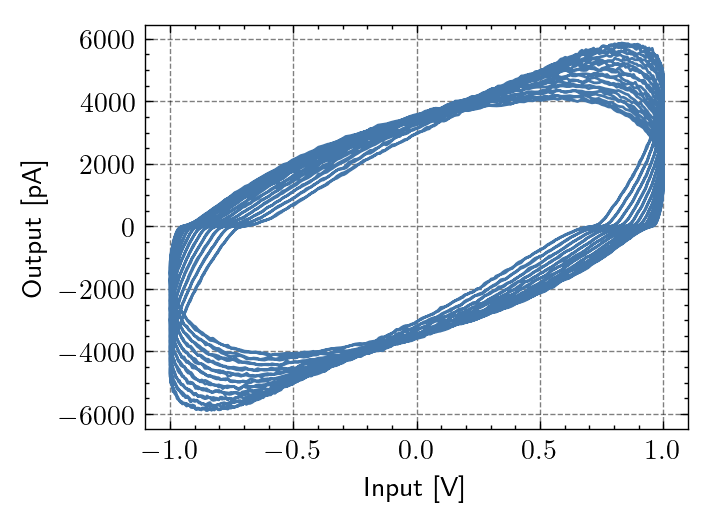

In [43]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(df['E0'], df['Current'])
    ax.set_ylabel('Output [pA]')
    ax.set_xlabel('Input [V]')

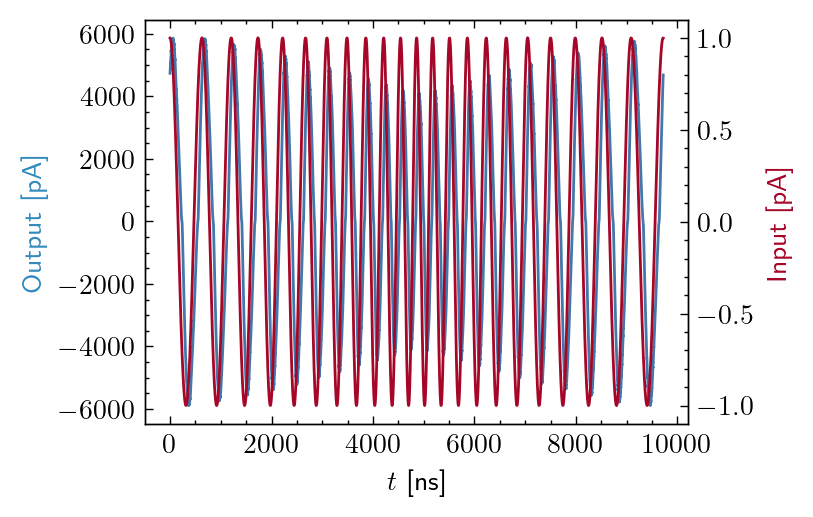

In [44]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(df['Current'], zorder=10)
    ax2 = ax.twinx()
    ax2.plot(df['E0'], nanonets_utils.red_color)
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel('Output [pA]', c=nanonets_utils.blue_color)
    ax2.set_ylabel('Input [pA]', c=nanonets_utils.red_color)

    fig.savefig("plots/hysteresis_I_O.svg", transparent=True)